<a href="https://colab.research.google.com/github/mtstolledo/Data_Science_Unimed_Dio/blob/main/An%C3%A1lise_de_dados_com_Python_e_Pandas/An%C3%A1lise_Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Importando a biblioteca 
import pandas as pd 

In [6]:
#leitura dos arquivos

df1 = pd.read_excel("/content/Aracaju.xlsx")
df2 = pd.read_excel("/content/Fortaleza.xlsx")
df3 = pd.read_excel("/content/Natal.xlsx")
df4 = pd.read_excel("/content/Recife.xlsx")
df5 = pd.read_excel("/content/Salvador.xlsx")


In [7]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [8]:
#juntando todos os arquivos 
df = pd.concat([df1,df2,df3,df4,df5])

In [9]:
#Exibindo as 5 primeiras linhas 
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [10]:
#Exibindo as 5 ultimas linhas 
df.tail()


,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [11]:
#Amostra
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
223,Salvador,2019-01-02,40.51,1037,2
88,Recife,2019-01-01,180.24,980,6
12,Fortaleza,2019-01-01,80.73,1004,2
98,Recife,2019-01-01,137.34,981,8
21,Fortaleza,2019-01-01,40.63,1004,3


In [12]:
#Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [13]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

### Tratando valores faltantes❗

In [14]:
# Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [15]:
df["Vendas"].mean()

122.61180089485458

In [16]:
# Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [17]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [18]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
6,Fortaleza,2019-01-01,38.40,1003,4
118,Recife,2019-03-02,17.70,981,5
30,Recife,2019-01-01,12.35,980,5
30,Salvador,2019-01-01,47.96,1034,2
231,Salvador,2019-01-03,89.85,1034,2


In [19]:
# Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [20]:
# Apagando as linhas com os valores nulos com base apenas em uma coluna
df.dropna(subset=["Vendas"], inplace=True)

In [21]:
# Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

#Criando colunas novas

In [23]:
#Criando a coluna de receitas
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [28]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [29]:
df["Receita"].max()

3544.0

In [30]:
df["Receita"].min()

3.34

In [31]:
# Descobrindo a 3 maiores receitas
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [37]:
# Agrupamento Total de vendas por cidade
df.groupby("Cidade")["Vendas"].sum()

Cidade
Aracaju       9472.98
Fortaleza    10120.71
Natal        59187.76
Recife       11119.10
Salvador     19714.40
Name: Vendas, dtype: float64

In [38]:
# Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


#Trabalhando com datas


In [47]:
#Transformando a coluna em data do tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [50]:
df["Data"] = pd.to_datetime(df["Data"])

In [52]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [53]:
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [106]:
# Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [107]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano Venda,Mês_Venda,Dia_Venda,diferenca_dias,trimestre_vendas,Ano_Venda
217,Salvador,2019-01-02,37.65,1036,2,75.30,2019,1,2,366 days,1,2019
144,Salvador,2019-01-02,23.38,1034,1,23.38,2019,1,2,366 days,1,2019
102,Recife,2019-01-01,96.50,982,7,675.50,2019,1,1,365 days,1,2019
63,Recife,2019-01-01,37.95,980,2,75.90,2019,1,1,365 days,1,2019
90,Fortaleza,2019-01-01,18.01,1005,2,36.02,2019,1,1,365 days,1,2019


In [61]:
# Extraindo o mês e o dia
df["Mês_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [62]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano Venda,Mês_Venda,Dia_Venda
33,Salvador,2019-01-01,144.19,1035,2,288.38,2019,1,1
132,Natal,2019-01-02,19.61,1036,2,39.22,2019,1,2
12,Aracaju,2019-01-01,9.78,1520,8,78.24,2019,1,1
98,Fortaleza,2019-01-01,15.00,1005,2,30.00,2019,1,1
48,Fortaleza,2019-01-01,40.71,1002,6,244.26,2019,1,1


In [64]:
# Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [70]:
df["diferenca_dias"].sample(5)

109   425 days
77      0 days
108     0 days
151   366 days
80    365 days
Name: diferenca_dias, dtype: timedelta64[ns]

In [71]:
# Criando a coluna de trimestre
df["trimestre_vendas"] = df["Data"].dt.quarter

In [73]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano Venda,Mês_Venda,Dia_Venda,diferenca_dias,trimestre_vendas
146,Natal,2019-01-02,149.88,1037,1,149.88,2019,1,2,366 days,1
99,Aracaju,2018-01-01,139.32,1521,3,417.96,2018,1,1,0 days,1
23,Fortaleza,2019-01-01,85.90,1004,5,429.50,2019,1,1,365 days,1
39,Fortaleza,2019-01-01,176.51,1005,1,176.51,2019,1,1,365 days,1
20,Salvador,2019-01-01,33.97,1034,3,101.91,2019,1,1,365 days,1


In [75]:
# Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) &(df["Data"].dt.month == 3)]
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano Venda,Mês_Venda,Dia_Venda,diferenca_dias,trimestre_vendas
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


#Visualização de dados

In [76]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

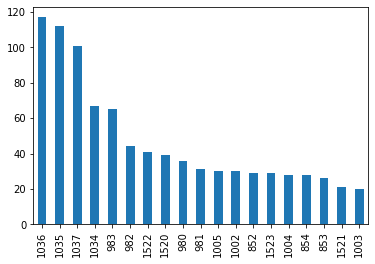

In [77]:
# Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

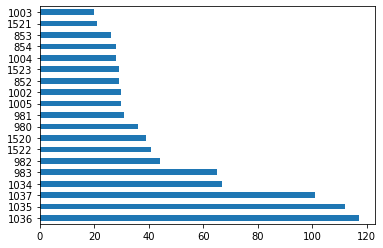

In [78]:
# Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=False).plot.barh();

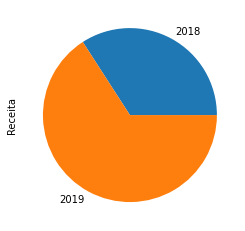

In [86]:
# Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [90]:
# Total de vendas por cidade
df["Cidade"].value_counts

<bound method IndexOpsMixin.value_counts of 0       Aracaju
1       Aracaju
2       Aracaju
3       Aracaju
4       Aracaju
         ...   
235    Salvador
236    Salvador
237    Salvador
238    Salvador
239    Salvador
Name: Cidade, Length: 894, dtype: object>

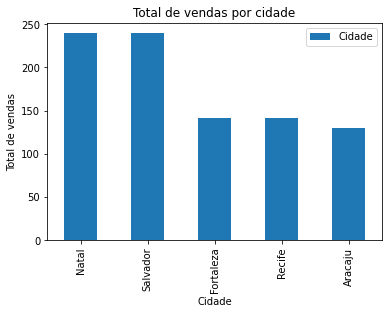

In [92]:
# Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");
plt.legend();

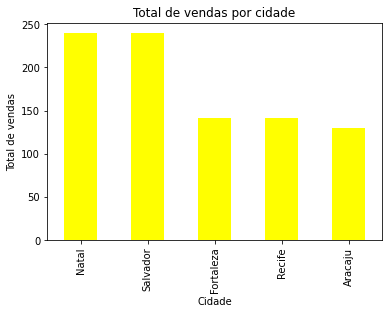

In [94]:
# Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="yellow")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

In [96]:
# Alterando o estilo
plt.style.use("ggplot")

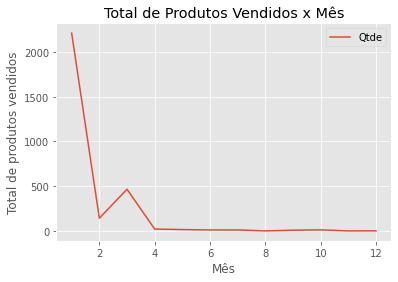

In [98]:
df.groupby(df["Mês_Venda"])["Qtde"].sum().plot(title="Total de Produtos Vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();

In [105]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano Venda,Mês_Venda,Dia_Venda,diferenca_dias,trimestre_vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1,0 days,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1,0 days,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1,0 days,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1,0 days,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1,0 days,1


In [109]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]


In [110]:
data.drop(["Ano Venda"], axis=1, inplace=True)

NameError: ignored

In [114]:
#Excluindo coluna
df.drop(["Ano Venda"], axis=1, inplace=True)

In [115]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Mês_Venda,Dia_Venda,diferenca_dias,trimestre_vendas,Ano_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1,1,0 days,1,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,1,1,0 days,1,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1,1,0 days,1,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,1,1,0 days,1,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,1,1,0 days,1,2018


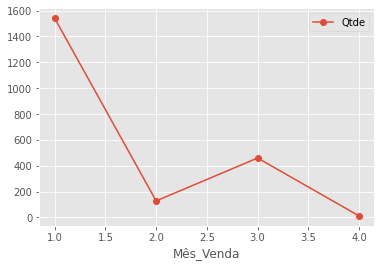

In [117]:
# Total de produtos vendidos por mês
df_2019.groupby(df_2019["Mês_Venda"])["Qtde"].sum().plot(marker="o")
plt.xlabel = "Mês"
plt.ylabel = "Total de produtos vendidos"
plt.legend();

In [119]:
df_2019.groupby(df_2019["Mês_Venda"])["Qtde"].sum()

Mês_Venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

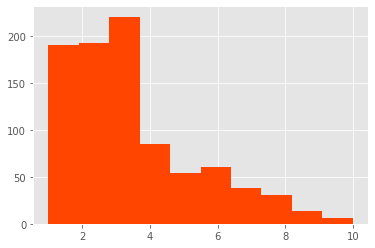

In [120]:
# Histograma
plt.hist(df["Qtde"], color="orangered");

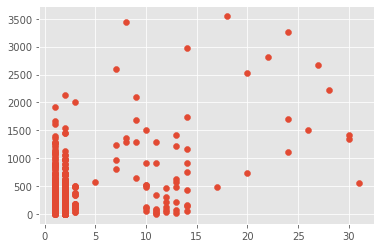

In [121]:
# Gráfico de dispersão
plt.scatter(x = df_2019["Dia_Venda"], y = df_2019["Receita"]);

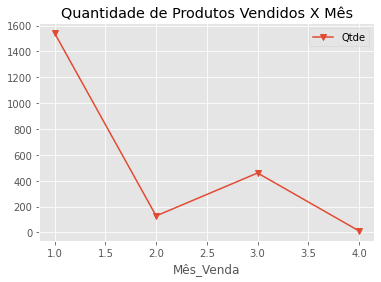

In [123]:
# Salvando em png
df_2019.groupby(df_2019["Mês_Venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de Produtos Vendidos X Mês")
plt.xlabel = "Mês"
plt.ylabel = "Total de produtos vendidos"
plt.legend()
plt.savefig("grafico qtde x mes.png")